In [122]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [123]:
mtcars = pd.read_csv("mtcars.csv")
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [124]:
X = mtcars.wt
X = np.array(X)

Y = mtcars.mpg
Y = np.array(Y)

print("X = ",X)

print("Y = ",Y)

X =  [2.62  2.875 2.32  3.215 3.44  3.46  3.57  3.19  3.15  3.44  3.44  4.07
 3.73  3.78  5.25  5.424 5.345 2.2   1.615 1.835 2.465 3.52  3.435 3.84
 3.845 1.935 2.14  1.513 3.17  2.77  3.57  2.78 ]
Y =  [21.  21.  22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2
 10.4 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.  30.4
 15.8 19.7 15.  21.4]


## Write a user defined function ‘myFnLinReg(x,y)’to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.

In [125]:
def myFnLinReg(x,y):

    x_mean = np.mean(X)
    y_mean = np.mean(Y)

    beta1 = np.sum((X-x_mean)*(Y-y_mean))/np.sum((X-x_mean)**2)
    beta0 = y_mean - beta1*x_mean

    return beta0, beta1

## Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (80 %,20%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.

In [126]:
beta0, beta1 = myFnLinReg(X,Y)
Y_pred = beta0 + beta1*X
print("y = {} + {}x".format(beta0,beta1))

y = 37.285126167342035 + -5.344471572722677x


Text(0, 0.5, 'Miles per Gallon')

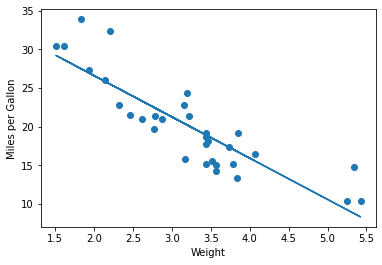

In [127]:
plt.scatter(X,Y)
plt.plot(X, Y_pred)
plt.xlabel("Weight")
plt.ylabel("Miles per Gallon")

In [128]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [129]:
beta0, beta1 = myFnLinReg(X_train,Y_train)
Y_pred_train = beta0 + beta1*X_train

Text(0, 0.5, 'Miles per Gallon')

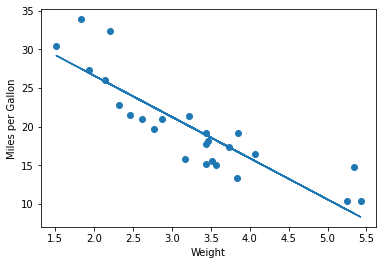

In [130]:
plt.scatter(X_train,Y_train)
plt.plot(X_train, Y_pred_train)
plt.xlabel("Weight")
plt.ylabel("Miles per Gallon")

In [131]:
def predict(x_test):
    y = beta0 + beta1*x_test
    return y

## What is the mpg of a car, whose weight is 5.5?

In [132]:
print("MPG of car with weight 5.5 = {} MPG".format(predict(5.5)))

MPG of car with weight 5.5 = 7.890532517367312 MPG


In [133]:
Y_pred_test = predict(X_test)

Text(0, 0.5, 'Miles per Gallon')

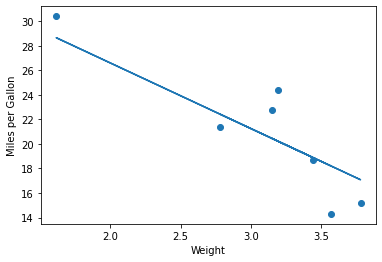

In [134]:
plt.scatter(X_test,Y_test)
plt.plot(X_test, Y_pred_test)
plt.xlabel("Weight")
plt.ylabel("Miles per Gallon")

## Compute and print accuracy measures such as RMSE and R2 for the test set. 

In [135]:
def findRMSE(y_true, y_pred):
    return np.sqrt(np.mean(np.abs((np.subtract(y_true,y_pred))**2)))

In [136]:
rmse = findRMSE(Y_test,Y_pred_test)
print("RMSE = ", rmse)

RMSE =  2.557947332019821


In [137]:
def findRSquare(y_true, y_pred):
    y_mean = np.mean(y_true)
    ssr = np.sum(np.subtract(y_pred, y_mean)**2)
    sst = np.sum(np.subtract(y_true, y_mean)**2)
    
    return np.divide(ssr,sst)

In [138]:
rsquare = findRSquare(Y_test, Y_pred_test)
print("RSquare = ", rsquare)

RSquare =  0.4762979642034058


In [139]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(Y_pred_test,Y_test)
rmse = mean_squared_error(Y_pred_test, Y_test)**0.5

print("(RSquare = {}, RMSE = {})".format(r2, rmse))

(RSquare = 0.48485741647097813, RMSE = 2.557947332019821)


## Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.

In [140]:
I_history = []
def MiniBatchLinReg(X_train,Y_train, batch_size):       
    coeff = {} 
    costs = [] 
    alpha = 0.01
    epochs = 1000
    
    M = X_train.shape[0] 
    
    # initialising random values for weight and 0 for bias
    w = np.random.randn()
    b = 0
    
    n_batches = M/batch_size # number of batches
    
    flag = 0
    
    if n_batches > int(n_batches):
        flag = 1
    
    n_batches = int(n_batches)
    
    for epoch in range(epochs):
        I_history.append(epoch)
        batch = 0     
        m_b_costs = []
        
        while batch < n_batches:
            
            X = X_train[batch*batch_size: (batch+1)*batch_size]
            Y = Y_train[batch*batch_size: (batch+1)*batch_size]
            
            h = w*X + b 
        
            J = (1/(2*M))*((h - Y)**2).sum()

            costs.append(J)

            dw = (1/M)*(((h - Y).dot(X)).sum()) 
            db = (1/M)*((h - Y).sum())

            w = w - alpha * dw
            b = b - alpha * db
            
            batch += 1
        
        if flag == 1:
            X = X_train[batch*batch_size:]
            
            h = w*X_train + b 
            J = (1/(2*M))*(((h - Y_train)**2).sum())
            
            costs.append(J)
            
            dw = (1/M)*(((h - Y_train).dot(X_train)).sum())
            db = (1/M)*((h - Y_train).sum())
        

        w = w - alpha * dw
        b = b - alpha * db
        
    coeff["theta"] = w
    coeff["bias"] =  b
    
    return coeff,costs

In [141]:
def predict(X_test, coeff):
    y_pred = np.dot(X_test, coeff['theta']) + coeff['bias'] 
    return y_pred

In [142]:
coeff, J_history = MiniBatchLinReg(X_train, Y_train, 40)
Y_pred_test = predict(X_test, coeff)


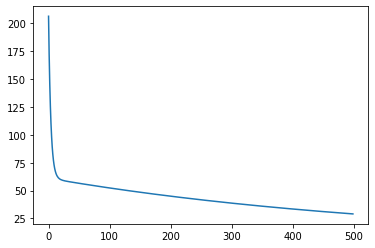

In [143]:
#Checking for working of Stochastic Gradient Descent

plt.plot(I_history[:500], J_history[:500])
plt.show()

In [144]:
def SGD(x_train, y_train, alpha = 0.006, m = 10000):
    t0 = 0
    t1 = 0
    for i in range(m):
        y_i = t0 + t1 * x_train
        t0 = t0 - (alpha * sum(y_i - y_train)) / len(x_train)
        t1 = t1 - (alpha * sum((y_i - y_train) * x_train)) / len(x_train)
    return t0, t1, y_i

In [145]:
def predict(b0, b1, X_test):
    y = b0 + b1*X_test
    return y

In [146]:
b0, b1, Y_pred_train_new = SGD(X_train, Y_train)
Y_pred_test_new = predict(b0, b1, X_test)

Text(0, 0.5, 'Miles per Gallon')

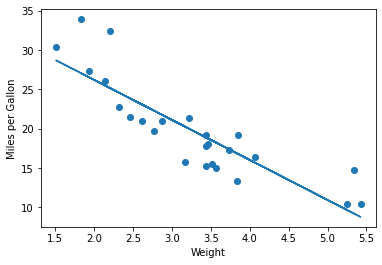

In [147]:
plt.scatter(X_train,Y_train)
plt.plot(X_train, Y_pred_train_new)
plt.xlabel("Weight")
plt.ylabel("Miles per Gallon")

Text(0, 0.5, 'Miles per Gallon')

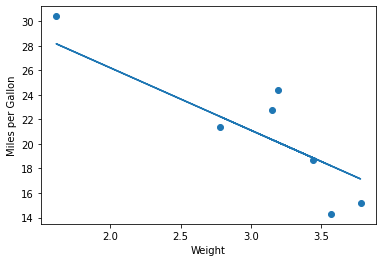

In [148]:
plt.scatter(X_test,Y_test)
plt.plot(X_test, Y_pred_test_new)
plt.xlabel("Weight")
plt.ylabel("Miles per Gallon")